In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [5]:
ipl_data=pd.read_csv('matches.csv')
deliveries = pd.read_csv('deliveries.csv')

In [7]:
ipl_data.head()

,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [6]:
ipl_data.drop("id", axis=1,inplace=True)

In [8]:
ipl_data.isnull().sum()

season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

In [9]:
ipl_data['city'].fillna(method="ffill",inplace=True)
ipl_data['winner'].fillna("Draw",inplace=True)
ipl_data['player_of_match'].fillna(method="ffill",inplace=True)
ipl_data['umpire1'].fillna(method="ffill",inplace=True)
ipl_data['umpire2'].fillna(method="ffill",inplace=True)
ipl_data['umpire3'].fillna(method="bfill",inplace=True)

In [12]:
ipl_data.isnull().sum()

season             0
city               0
date               0
team1              0
team2              0
toss_winner        0
toss_decision      0
result             0
dl_applied         0
winner             0
win_by_runs        0
win_by_wickets     0
player_of_match    0
venue              0
umpire1            0
umpire2            0
umpire3            0
dtype: int64

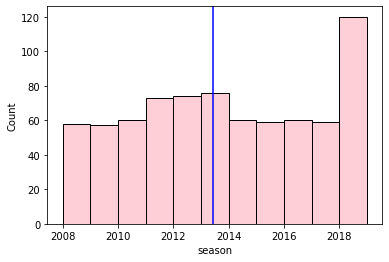

In [18]:
sns.histplot(ipl_data['season'],color='pink')
plt.axvline(ipl_data['season'].mean(),color='blue')

Maximum number of matches were played in 2019

In [17]:
win=0
loss=0
for i in range(len(ipl_data)):
    if ipl_data['toss_winner'][i]==ipl_data['winner'][i]:
        win+=1
    else:
        loss+=1
win,loss

(393, 363)

The team who wins toss has a higher chance of winning the game

<AxesSubplot:xlabel='toss_decision', ylabel='Count'>

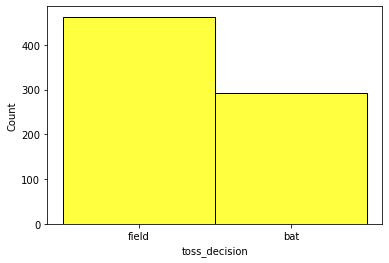

In [19]:
sns.histplot(ipl_data['toss_decision'],color='yellow')

Teams have chosen fielding more than batting on winning the toss

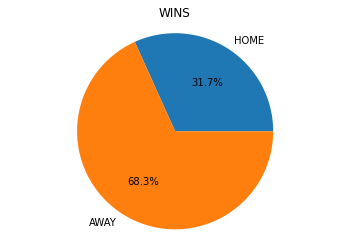

In [28]:
home_win = 0
away_win=0
gr=ipl_data['winner']
for i in range(len(ipl_data)):
  if ipl_data['city'][i] in gr[i].split():
     home_win+=1
  else:
     away_win+=1
data=[home_win,away_win]
label='HOME','AWAY'
plt.pie(data,labels=label,autopct='%1.1f%%')
plt.title('WINS')
plt.axis('equal')
plt.show()

AWAY WINS ARE MORE THAN HOME WINS

<AxesSubplot:>

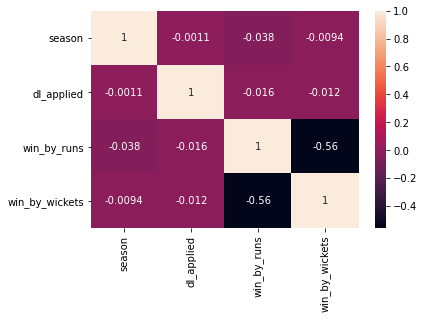

In [29]:
sns.heatmap(ipl_data.corr(),annot=True)

<AxesSubplot:xlabel='result', ylabel='Count'>

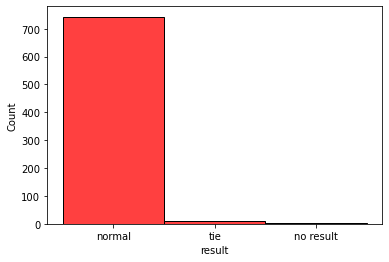

In [31]:
sns.histplot(ipl_data['result'],color="red")

Most matches had a normal result

In [61]:
for i in range(len(ipl_data)):
    done=""
    m=0
    mx=""
    k=ipl_data['player_of_match'][i]
    if(k in done):
        continue
    else:
        c=1
        for j in range(i+1,len(ipl_data)):
            if k==ipl_data['player_of_match'][j]:
                c+=1
        done=done+k
        if c>m:
            m=c
            mx=k
mx            

'JJ Bumrah'

<AxesSubplot:xlabel='winner', ylabel='count'>

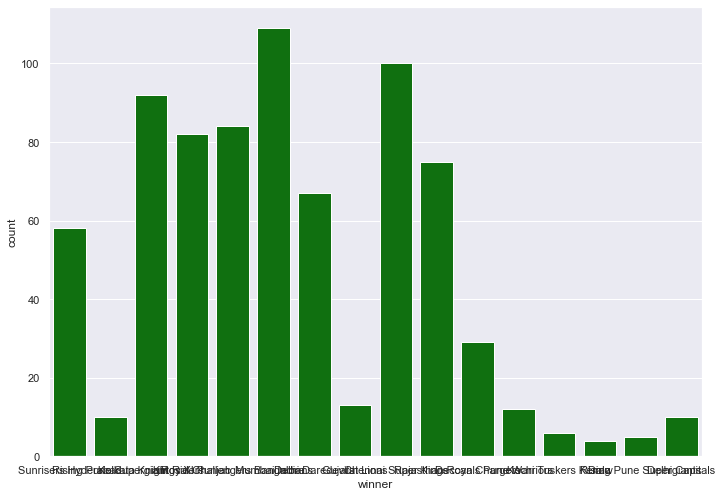

In [63]:
sns.countplot(x='winner',data=ipl_data,color='green')